Imports and drive setup

In [17]:
import numpy as np
import pandas as pd

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Purpose: Analyze Counter Strike Game Data

Import "CSGO_data.pickle" dataset

**If using Google Colab, just upload the pickle file directly on the left-hand side**

In [19]:
df = pd.read_pickle("CSGO_data.pickle")

#Exploratory Analysis

##Big picture
Initial details: 221,330 observations and 22 characteristics\
No signs of irregular typing that need to be fixed.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221330 entries, 0 to 221329
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   round_num                       221330 non-null  int64  
 1   tick                            221330 non-null  int64  
 2   side                            221330 non-null  object 
 3   team                            221330 non-null  object 
 4   hp                              221330 non-null  int64  
 5   armor                           221330 non-null  int64  
 6   is_alive                        221330 non-null  bool   
 7   x                               221330 non-null  int64  
 8   y                               221330 non-null  int64  
 9   z                               221330 non-null  int64  
 10  inventory                       173850 non-null  object 
 11  total_utility                   221330 non-null  float64
 12  equipment_value_

#Null Values
There are Null values in inventory and area_name

In [21]:
df.isna().sum()

round_num                             0
tick                                  0
side                                  0
team                                  0
hp                                    0
armor                                 0
is_alive                              0
x                                     0
y                                     0
z                                     0
inventory                         47480
total_utility                         0
equipment_value_freezetime_end        0
area_name                            14
seconds                               0
clock_time                            0
t_alive                               0
ct_alive                              0
bomb_planted                          0
map_name                              0
utility_used                          0
player                                0
dtype: int64

#None in 'area_name' column
Further investigation shows that **None** in 'area_name' column are all on CT side at marked at 1:55 for both Team1 and Team2. 1:55 is the start of the round. The **None** is a result of specific a spawn location (as indicated in 'x', 'y', 'z' coordinates below) on the map that is not marked with a name. The 'player' column shows that it is not just for a particular player, but multiple players get this None area briefly. As such, no further work necessary.

In [22]:
nulls = df[df['area_name'].isna()]
nulls.head(100)

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
35632,19,336136,CT,Team1,100,100,True,-2400,657,477,...,4650,None,0,01:55,5,5,False,de_overpass,0.0,Player1
35633,19,336152,CT,Team1,100,100,True,-2388,670,475,...,4650,None,0,01:55,5,5,False,de_overpass,0.0,Player1
68328,4,51377,CT,Team2,100,100,True,-2398,656,476,...,4250,None,0,01:55,5,5,False,de_overpass,0.0,Player5
68329,4,51393,CT,Team2,100,100,True,-2382,668,475,...,4250,None,0,01:55,5,5,False,de_overpass,0.0,Player5
72416,9,137404,CT,Team2,100,100,True,-2402,651,478,...,5900,None,0,01:55,5,5,False,de_overpass,0.0,Player5
123204,18,318217,CT,Team1,100,100,True,-2396,655,477,...,4950,None,0,01:55,5,5,False,de_overpass,0.0,Player3
137855,8,119485,CT,Team2,100,100,True,-2402,654,478,...,5900,None,0,01:55,5,5,False,de_overpass,0.0,Player6
137856,8,119501,CT,Team2,100,100,True,-2390,665,475,...,5900,None,0,01:55,5,5,False,de_overpass,0.0,Player6
186136,13,196523,CT,Team2,100,100,True,-2404,651,479,...,5900,None,0,01:55,5,5,False,de_overpass,0.0,Player8
187255,14,216990,CT,Team2,100,100,True,-2401,656,477,...,5900,None,0,01:55,5,5,False,de_overpass,0.0,Player8


#None in 'Inventory' column


Further investigations show that **None** in 'inventory' column occurs when the players are dead as shown in the hp statistics in .describe() and the hp column of zero in .head() below. The reasonable conclusion is that the game empties a player's inventory to make the weapons retrievable by other active (alive) players. As such, no further investigation is necessary.

In [23]:
inv_None = df[df['inventory'].isna()]
inv_None.describe

<bound method NDFrame.describe of         round_num    tick side   team  hp  armor  is_alive     x     y    z  \
276             1    6927    T  Team1   0      0     False -2667 -1522  434   
277             1    6943    T  Team1   0      0     False -2667 -1522  434   
278             1    6959    T  Team1   0      0     False -2667 -1522  434   
279             1    6975    T  Team1   0      0     False -2667 -1522  434   
280             1    6991    T  Team1   0      0     False -2667 -1522  434   
...           ...     ...  ...    ...  ..    ...       ...   ...   ...  ...   
221325         30  514156    T  Team2   0      0     False -1508  -372  200   
221326         30  514172    T  Team2   0      0     False -1508  -372  200   
221327         30  514188    T  Team2   0      0     False -1508  -372  200   
221328         30  514204    T  Team2   0      0     False -1508  -372  200   
221329         30  514220    T  Team2   0      0     False -1508  -372  200   

        ... equip

Dataframe statistics of players show zero hp and zero armor when inventory is None.

In [24]:
inv_None.describe()

,round_num,tick,hp,armor,x,y,z,total_utility,equipment_value_freezetime_end,seconds,t_alive,ct_alive,utility_used
count,47480.000000,47480.000000,47480.000000,47480.000000,47480.00000,47480.000000,47480.000000,47480.0,47480.000000,47480.000000,47480.000000,47480.000000,47480.0
mean,15.287911,263037.279360,0.080034,0.006318,-1847.35754,-575.734520,276.306171,0.0,4236.225779,57.844882,2.393703,3.020072,0.0
std,8.567537,156206.665963,2.827920,0.794870,920.71091,881.341876,194.865089,0.0,2084.032218,31.442210,1.435041,1.363099,0.0
min,1.000000,5039.000000,0.000000,0.000000,-3634.00000,-3068.000000,3.000000,0.0,200.000000,0.000000,0.000000,0.000000,0.0
25%,8.000000,126969.000000,0.000000,0.000000,-2573.00000,-985.000000,96.000000,0.0,2600.000000,33.000000,1.000000,2.000000,0.0
50%,16.000000,293464.000000,0.000000,0.000000,-1968.00000,-500.000000,372.000000,0.0,5000.000000,58.000000,2.000000,3.000000,0.0
75%,23.000000,406460.000000,0.000000,0.000000,-923.00000,130.000000,472.000000,0.0,5600.000000,83.000000,4.000000,4.000000,0.0
max,30.000000,514220.000000,100.000000,100.000000,-162.00000,1227.000000,581.000000,0.0,8250.000000,120.000000,5.000000,5.000000,0.0


As confirmed in the statistics of .describe(), when inventory is None, the hp and armor are also zero.

In [25]:
inv_None.head(10)

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
276,1,6927,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,35,01:21,4,3,False,de_overpass,0.0,Player0
277,1,6943,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,35,01:21,4,3,False,de_overpass,0.0,Player0
278,1,6959,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,35,01:21,4,3,False,de_overpass,0.0,Player0
279,1,6975,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,35,01:21,4,3,False,de_overpass,0.0,Player0
280,1,6991,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,35,01:20,4,3,False,de_overpass,0.0,Player0
281,1,7007,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,35,01:20,4,3,False,de_overpass,0.0,Player0
282,1,7023,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,35,01:20,4,3,False,de_overpass,0.0,Player0
283,1,7039,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,35,01:20,4,3,False,de_overpass,0.0,Player0
284,1,7055,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,36,01:20,4,3,False,de_overpass,0.0,Player0
285,1,7071,T,Team1,0,0,False,-2667,-1522,434,...,900,LowerPark,36,01:20,4,3,False,de_overpass,0.0,Player0


##Statistical information
Get an overall sense of the data. There are 30 games and generally, players stay relative healthy in these games as 50% and 75% percentiles are stay at 100 health points and 100 armor points.

In [26]:
df.describe()

,round_num,tick,hp,armor,x,y,z,total_utility,equipment_value_freezetime_end,seconds,t_alive,ct_alive,utility_used
count,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000
mean,15.353319,261107.319613,73.277369,69.728817,-1819.130665,-654.268468,273.244215,1.087638,4494.533728,44.036371,3.749559,4.106944,0.002408
std,8.364132,152520.427227,41.329548,43.828431,900.465391,1036.420364,185.746748,1.245739,2074.792692,30.125404,1.469013,1.258415,0.055823
min,1.000000,2511.000000,0.000000,0.000000,-3960.000000,-3401.000000,0.000000,0.000000,200.000000,0.000000,0.000000,0.000000,-2.000000
25%,8.000000,127101.000000,49.000000,0.000000,-2439.000000,-1322.000000,96.000000,0.000000,3900.000000,19.000000,3.000000,4.000000,0.000000
50%,14.000000,230990.000000,100.000000,100.000000,-1857.000000,-523.000000,273.000000,1.000000,5000.000000,39.000000,4.000000,5.000000,0.000000
75%,23.000000,399900.000000,100.000000,100.000000,-1007.000000,162.000000,472.000000,2.000000,5850.000000,66.000000,5.000000,5.000000,0.000000
max,30.000000,514220.000000,100.000000,100.000000,-49.000000,1606.000000,618.000000,4.000000,8250.000000,120.000000,5.000000,5.000000,1.000000


There are a max of 10 players for the 30 games

In [27]:
df['player'].unique()

array(['Player0', 'Player1', 'Player2', 'Player5', 'Player7', 'Player3',
       'Player6', 'Player4', 'Player8', 'Player9'], dtype=object)

There are 26 possible 'map_areas' that players can be in at during the game, including a **None** spawn location.

In [28]:
areas = len(df['area_name'].unique())
print(areas)
print(df['area_name'].unique())

26
['TSpawn' 'TStairs' 'Tunnels' 'Fountain' 'LowerPark' 'Playground' 'Alley'
 'Connector' 'BombsiteA' 'Canal' 'Pipe' 'Water' 'Construction' 'UpperPark'
 'Restroom' 'Lobby' 'StorageRoom' 'SnipersNest' 'BackofA' 'Stairs'
 'UnderA' 'Walkway' 'Bridge' 'BombsiteB' None 'SideAlley']


#Correlation Heatmap
The following heatmap shows columns that are highly correlated with each other in white and black. It is good practice to remove correlated variables during feature selection, but I don't think it is necessary to remove any since keeping these columns is unlikely to affect my analysis. Further reasoning is provided below.

1) It makes sense that 'armor', 'hp', and 'is_alive' are correlated with one another and these columns should not affect my analysis.

2) Correlation between 'tick' and 'round_num' should not affect my analysis.

3) Correlation between 'z' and 'x' should not affect my analysis.

4) Correlation between 'bomb_planted' and 'ct_alive' should not affect my analysis.

<ipython-input-29-91af870b7b07>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

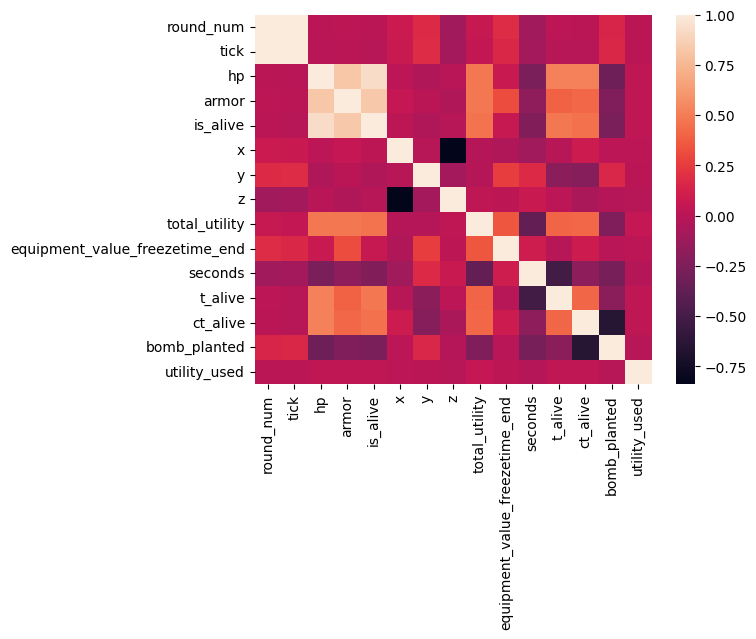

In [29]:
import seaborn as sns

sns.heatmap(df.corr())

##Closing thoughts on data exploration
No major issues with the dataset provided. As such, my analysis will not need further data processing or ETL to clean and transform the dataset. A minor extraction will be necessary for 'weapons_class' but that can be done quickly with two simple methods.

I will begin the data analysis and programming portion in the parts below.

The class below will handle the following:

1) Initialize the game state with a set boundary of coordinates to determine player traversal in that specified area

2) Iterate through the dataframe of game data and determine if the current observation is in that set boundary

3) Extract player inventory from the JSON dictionary in each observation

In [30]:
from collections import defaultdict
xy = [[-1735, 250], [-2024, 398], [-2806, 742], [-2472, 1233],[-1565, 580]]
z = [285, 421]


class ProcessGameState:
    def __init__(self, coordinates, z):
        self.coord = coordinates
        self.z_point = z
        self.df = pd.read_pickle("CSGO_data.pickle")

        #Additional column to determine when player is in bounds of light blue box
        self.df['tmp_inbounds'] = False
        self.edges = []
        self.team2_df = self.df[(self.df['side'] == 'T') & (self.df['team'] == 'Team2')]

        #create the edges of each two points of the given lightblue boundary in the gamemap




        for i in range(len(self.coord) - 1):
          self.edges.append([self.coord[i], self.coord[i+1]])
        #create the last connecting edge between first and last coordinate pairs to close the polygon
        self.edges.append([self.coord[-1], self.coord[0]])

    def check(self, cur_x, cur_y, z):
        #Boundary check z coordinate first. If passes, it will continue to check (x,y)
        #against every edge in the edges list using ray-tracing algorithm
        #This has an O(n) runtime as it checks a given (x,y) pair
        #against every edge in the edges list in the forloop below. It can be further expanded
        # to O(n * K) where K is the number of (x,y) pair coordinates we are given in the datafile to check
        # against the edges list. Checking z coordinate is a O(1) operation.
        if z > self.z_point[1] or z < self.z_point[0]:
          return False

        count = 0
        for edge in self.edges:
          (x_1, y_1), (x_2, y_2) = edge
          if (cur_y < y_1) != (cur_y < y_2):
              if cur_x < x_1 + ((cur_y-y_1)/(y_2-y_1))*(x_2-x_1):
                count+=1

        return count%2 == 1

    def checkAllBoundaries(self):
        #This iterates through each row and checks whether the current row (x,y,z)
        #is in bounds and updated in column 'tmp_inbounds'
        for index, row in self.team2_df.iterrows():
            self.team2_df.at[index, 'tmp_inbounds'] = self.check(row['x'], row['y'], row['z'])
        return

    def extractWeaponTypes(self):
        # (1) Returns all the weapon classes seen and (2) extracts the weapon classes of each
        # row into 'weapon_class' column cell as a dictionary of counts of different weapon classes
        # If there are no weapons in the current observation, the 'weapon_class' cell of that observation contains None

        # For SELF
        # JSON:'weapon_class'
        self.df['weapon_class'] = None
        all_weapons = set()

        for index, row in self.df.iterrows():
          row_weapons = {}
          if row['inventory'] is None:
            continue
          #iterate through every weapon class in that current observation JSON object
          for item in row['inventory']:
            row_weapons[item['weapon_class']] = row_weapons.get(item['weapon_class'], 0) + 1
            all_weapons.add(item['weapon_class'])

          self.df.at[index, 'weapon_class'] = row_weapons

        return all_weapons

In [31]:
tmp = ProcessGameState(xy, z)

Identifying what weapons are in players' inventories

In [32]:
print(tmp.extractWeaponTypes())

{'SMG', 'Pistols', 'Grenade', 'Rifle'}



#For the sake of readability of this script, The following will leverage stored dataframes in said the class implemented above without creating new methods, preventing the user to scroll back and forth between function calls.


By calling checkAllBoundaries() the user can then determine which game rounds the players enter the user specified boundary.

In [33]:
tmp.checkAllBoundaries()

In [34]:
tmp.team2_df[tmp.team2_df['tmp_inbounds'] == True].groupby(['round_num']).size()

round_num
16    19
dtype: int64

##Further Investigations

Specific metrics: What is the average timer that Team2 on T (terrorist) side enters “BombsiteB” with least 2 rifles or SMGs?

Step 1) Find the games where teams enters BombsiteB

In [35]:
t2df = tmp.df[df['area_name'] == 'BombsiteB']
t2df.head()

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,tmp_inbounds,weapon_class
18791,25,444045,CT,Team1,100,100,True,-1074,-220,99,...,51,01:05,0,3,False,de_overpass,0.0,Player0,False,"{'Pistols': 1, 'Grenade': 1, 'Rifle': 1}"
20482,27,476221,CT,Team1,100,100,True,-1314,-79,173,...,91,00:25,0,3,False,de_overpass,0.0,Player0,False,"{'Rifle': 1, 'Pistols': 1}"
20483,27,476237,CT,Team1,100,100,True,-1283,-76,150,...,91,00:24,0,3,False,de_overpass,0.0,Player0,False,"{'Rifle': 1, 'Pistols': 1}"
20484,27,476253,CT,Team1,100,100,True,-1283,-73,170,...,91,00:24,0,3,False,de_overpass,0.0,Player0,False,"{'Rifle': 1, 'Pistols': 1}"
20485,27,476269,CT,Team1,100,100,True,-1283,-69,188,...,91,00:24,0,3,False,de_overpass,0.0,Player0,False,"{'Rifle': 1, 'Pistols': 1}"


Step 2) Find games for only Terrorist side and Team2

In [36]:
t2df = t2df[(t2df['side'] == 'T') & (t2df['team'] == 'Team2')]
t2df.head(10)

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,tmp_inbounds,weapon_class
77956,16,293384,T,Team2,100,100,True,-724,-3,50,...,51,01:05,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77957,16,293400,T,Team2,100,100,True,-736,25,56,...,51,01:05,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77958,16,293416,T,Team2,100,100,True,-746,53,61,...,51,01:04,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77959,16,293432,T,Team2,100,100,True,-756,82,66,...,51,01:04,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77960,16,293448,T,Team2,100,100,True,-769,109,73,...,51,01:04,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77961,16,293464,T,Team2,100,100,True,-788,128,82,...,51,01:04,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77962,16,293480,T,Team2,100,100,True,-810,148,93,...,52,01:04,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77963,16,293496,T,Team2,100,100,True,-835,164,96,...,52,01:04,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77964,16,293512,T,Team2,100,100,True,-861,178,96,...,52,01:04,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}
77965,16,293528,T,Team2,100,100,True,-883,198,96,...,52,01:04,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1}


Step 3) Create new column called '2_Rifles_SMG' in t2df dataframe to later determine which players carried rifles or SMG


In [37]:
t2df['Rifles'] = False
t2df['SMG'] = False

# t2df['2_Rifles_SMG'] = False
t2df.head()

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,tmp_inbounds,weapon_class,Rifles,SMG
77956,16,293384,T,Team2,100,100,True,-724,-3,50,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77957,16,293400,T,Team2,100,100,True,-736,25,56,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77958,16,293416,T,Team2,100,100,True,-746,53,61,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77959,16,293432,T,Team2,100,100,True,-756,82,66,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77960,16,293448,T,Team2,100,100,True,-769,109,73,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False


Step 4) Populate '2_Rifles_SMG' column using the following forloop, which accesses each dictionary (extracted from 1c) in the 'weapon_class' column and updates '2_Rifles_SMG' to **True**
if there is a Rifle or SMG in the player's inventory

In [38]:
for index, row in t2df.iterrows():
  if row['weapon_class'] is None:
    continue
  for weapon, count in row['weapon_class'].items():
    if (weapon == 'Rifle') and count >= 1:
      t2df.at[index,'Rifles'] = True
    if (weapon == 'SMG') and count >= 1:
      t2df.at[index,'SMG'] = True


##*Quick Sanity Check for 'weapon_class', 'Rifles', and 'SMG' columns*
Occurence of either Rifle or SMG in 'weapon_class' should be followed by **True** in
'Rifles' or 'SMG' columns.

In [39]:
# pd.set_option('display.max_rows', 100)
hold = t2df[t2df['Rifles'] == True]
hold.head()

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,tmp_inbounds,weapon_class,Rifles,SMG
81014,21,359112,T,Team2,74,94,True,-902,-296,96,...,3,5,False,de_overpass,0.0,Player5,False,"{'Pistols': 1, 'Rifle': 1}",True,False
81015,21,359128,T,Team2,48,88,True,-903,-289,96,...,3,5,False,de_overpass,0.0,Player5,False,"{'Pistols': 1, 'Rifle': 1}",True,False
85027,25,441436,T,Team2,95,98,True,-874,-304,96,...,4,5,False,de_overpass,0.0,Player5,False,"{'Rifle': 1, 'Pistols': 1}",True,False
85028,25,441452,T,Team2,95,98,True,-869,-276,96,...,4,5,False,de_overpass,0.0,Player5,False,"{'Pistols': 1, 'Rifle': 1}",True,False
85029,25,441468,T,Team2,95,98,True,-869,-249,96,...,4,5,False,de_overpass,0.0,Player5,False,"{'Pistols': 1, 'Rifle': 1}",True,False


In [40]:
pd.set_option('display.max_rows', 100)
hold2 = t2df[t2df['SMG'] == True]
hold2.head()

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,tmp_inbounds,weapon_class,Rifles,SMG


Step 5) Find which rounds players brought a rifle into BombSiteB, grouping by 'player', 'area_name', and 'round_num' and we see that at least two rifles brought to BombSiteB in games 16, 21, 28, and 30 on Terrorist Side for Team2.

**#Note** As stated previously, since no SMG were used on Team2 Terrorist side, the work below will only process average time for 2 Rifles entering BombsiteB

In [41]:
checkTimer_df = t2df.groupby(['round_num','player', 'area_name'])
checkTimer_df = checkTimer_df[['round_num','player', 'Rifles', 'area_name']]
checkTimer_df.size()

round_num  player   area_name
16         Player5  BombsiteB     60
           Player6  BombsiteB    238
           Player7  BombsiteB     67
           Player8  BombsiteB    360
           Player9  BombsiteB     31
21         Player5  BombsiteB    627
           Player8  BombsiteB    643
25         Player5  BombsiteB    167
26         Player5  BombsiteB      2
28         Player5  BombsiteB    406
           Player6  BombsiteB    445
           Player7  BombsiteB    276
           Player8  BombsiteB    425
           Player9  BombsiteB     36
30         Player5  BombsiteB     24
           Player7  BombsiteB      7
           Player8  BombsiteB     21
dtype: int64

Step 6) Now we determine the time it takes for Terrorist side Team2 to enter BombSite B for rounds 16, 21, 28, and 30

In [42]:
games = {
         16: ['Player5', 'Player6', 'Player7', 'Player8', 'Player9'],
         21: ['Player5', 'Player8'],
         28: ['Player5', 'Player6', 'Player7', 'Player8', 'Player9'],
         30: ['Player5', 'Player7', 'Player8']
        }

t2df.head(10)

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,tmp_inbounds,weapon_class,Rifles,SMG
77956,16,293384,T,Team2,100,100,True,-724,-3,50,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77957,16,293400,T,Team2,100,100,True,-736,25,56,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77958,16,293416,T,Team2,100,100,True,-746,53,61,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77959,16,293432,T,Team2,100,100,True,-756,82,66,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77960,16,293448,T,Team2,100,100,True,-769,109,73,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77961,16,293464,T,Team2,100,100,True,-788,128,82,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77962,16,293480,T,Team2,100,100,True,-810,148,93,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77963,16,293496,T,Team2,100,100,True,-835,164,96,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77964,16,293512,T,Team2,100,100,True,-861,178,96,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False
77965,16,293528,T,Team2,100,100,True,-883,198,96,...,4,3,False,de_overpass,0.0,Player5,False,{'Pistols': 1},False,False


Step 7) Before calculating the time it takes for at least two rifles to enter BombSiteB, the following will add column 'clock_time_seconds' that takes the 'clock_time' column and converts the string into seconds.

*This takes about 40 seconds to complete*

In [43]:
#use original t2df from original gameState filtered for Terrorist and Team2
import datetime as dt
bsite_t2df = tmp.team2_df
bsite_t2df.head(50)

#create new column in dataframe to store 'clock_time' (str) converted to seconds (int)
bsite_t2df['clock_time_seconds'] = 0

#convert columns to minutes:secs
for index, row in bsite_t2df.iterrows():
    minutes =  60 if pd.to_datetime(row['clock_time'], format='%M:%S').minute == 1 else 0
    seconds = pd.to_datetime(row['clock_time'], format='%M:%S').second
    bsite_t2df.at[index, 'clock_time_seconds'] = seconds + minutes

<ipython-input-43-3503fbfd2fe3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsite_t2df['clock_time_seconds'] = 0


Step 8) Calculate times for time when two rifles or two SMGs enter BombSiteB

In [44]:
bsite_t2df = tmp.team2_df
# FOR SELF
#'area_name'

times = []
for round, players in games.items():

  round_time = []
  for cur_player in players:

    #Find round related this current round and player and find the first
    #first occurence of this player entering BombsiteB
    cur_round_df = bsite_t2df[(bsite_t2df['round_num'] == round) & (bsite_t2df['player'] == cur_player)]
    cur_round_df = cur_round_df[cur_round_df['area_name'] == 'BombsiteB']
    cur_round = cur_round_df[['round_num', 'clock_time_seconds', 'area_name', 'player']].iloc[0]


    #print for sanity check
    print(cur_round)

    #subtract this player's time to get to BombsiteB from 115 (1:55) start time
    #and add that number round_time
    round_time.append(115 - cur_round[1])

  round_time.sort()

  #append the second smallest time because we need to calculate the average time
  #it takes two rifles or SMGs to enter BombsiteB
  times.append([round_time[1]])

round_num                    16
clock_time_seconds           65
area_name             BombsiteB
player                  Player5
Name: 77956, dtype: object
round_num                    16
clock_time_seconds           64
area_name             BombsiteB
player                  Player6
Name: 144362, dtype: object
round_num                    16
clock_time_seconds           19
area_name             BombsiteB
player                  Player7
Name: 100306, dtype: object
round_num                    16
clock_time_seconds           70
area_name             BombsiteB
player                  Player8
Name: 188576, dtype: object
round_num                    16
clock_time_seconds           68
area_name             BombsiteB
player                  Player9
Name: 210729, dtype: object
round_num                    21
clock_time_seconds           95
area_name             BombsiteB
player                  Player5
Name: 81014, dtype: object
round_num                    21
clock_time_seconds           97
ar

In [45]:
#average Times for two rifles to enter BombsiteB
print(times)
#compute average
np.mean(times)

[[47], [20], [29], [38]]


33.5

###Findings

It takes, on average, 33.5s for Team2 on T (terrorist) side to enter
“BombsiteB” with least 2 rifles.


#Further Investigations
Where might Counter-Terrorists (CT) on Team2 hide when the bomb is planted at BombsiteB?


Step 1) Find observations for CT side and team2 and further narrow down to observations where the team enters BombsiteB and are still alive.

In [46]:
ct_siteB = tmp.df[(tmp.df['side'] == 'CT') & (tmp.df['team'] == 'Team2')]
ct_siteB = ct_siteB[(ct_siteB['area_name'] == 'BombsiteB') & (ct_siteB['is_alive'] == True)]
ct_siteB = ct_siteB[['round_num', 'clock_time',  'x', 'y', 'z', 'area_name', 'is_alive','player','tick']]

Step 2) Narrow down to the exact coordinates where CT side team2 players in BombsiteB

In [47]:
#Cleaned Data for USE
ct_siteB = ct_siteB[['x', 'y']]

Step 3) Group by xy coordinates to identify locations where there are a high number of player visits

In [48]:
pd.reset_option('all')
pd.set_option('display.max_rows', 500)

ct_siteB = ct_siteB.groupby(['x','y'], as_index=False).size()

ct_siteB[ct_siteB['size'] > 30].head()

<ipython-input-48-0e907866a9a3>:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
<ipython-input-48-0e907866a9a3>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
<ipython-input-48-0e907866a9a3>:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


,x,y,size
28,-1278,105,46
977,-909,161,37
978,-909,162,39
1411,-869,-193,31
1482,-863,222,68


Show xy coordinates where there are more than 15 visits

In [49]:
ct_siteB[ct_siteB['size'] > 15].describe()

,x,y,size
count,35.000000,35.000000,35.000000
mean,-846.600000,194.685714,42.657143
std,94.306821,254.572164,41.567056
min,-1278.000000,-272.000000,16.000000
25%,-869.000000,2.000000,18.000000
50%,-833.000000,225.000000,31.000000
75%,-791.500000,382.000000,45.000000
max,-738.000000,496.000000,234.000000


Use .describe() for more accurate picture

In [50]:
ct_siteB[ct_siteB['size'] > 15].describe

<bound method NDFrame.describe of          x    y  size
28   -1278  105    46
548   -992 -183    18
793   -938  496    16
961   -910  161    16
977   -909  161    37
978   -909  162    39
1382  -870 -182    18
1397  -869 -272    19
1405  -869 -202    29
1411  -869 -193    31
1414  -869 -187    19
1482  -863  222    68
1486  -863  228    17
1539  -858  225    76
1708  -840  151    16
1747  -838  496    43
1805  -834  496    24
1817  -833  496    36
1825  -832  496   138
1860  -829  100    21
1875  -828  102    44
1908  -826  496    54
2045  -813  496    16
2265  -793  382    25
2266  -793  383   234
2278  -792  382    40
2291  -791  377    66
2309  -790  375    28
2311  -790  377    55
2350  -787  368    42
2364  -786  365    18
2589  -749  303    39
2611  -744 -136    72
2652  -739  -96    17
2662  -738 -136    16>

In [51]:
ct_siteB = ct_siteB.pivot('y','x', 'size')

<ipython-input-51-84c41fe6c230>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ct_siteB = ct_siteB.pivot('y','x', 'size')


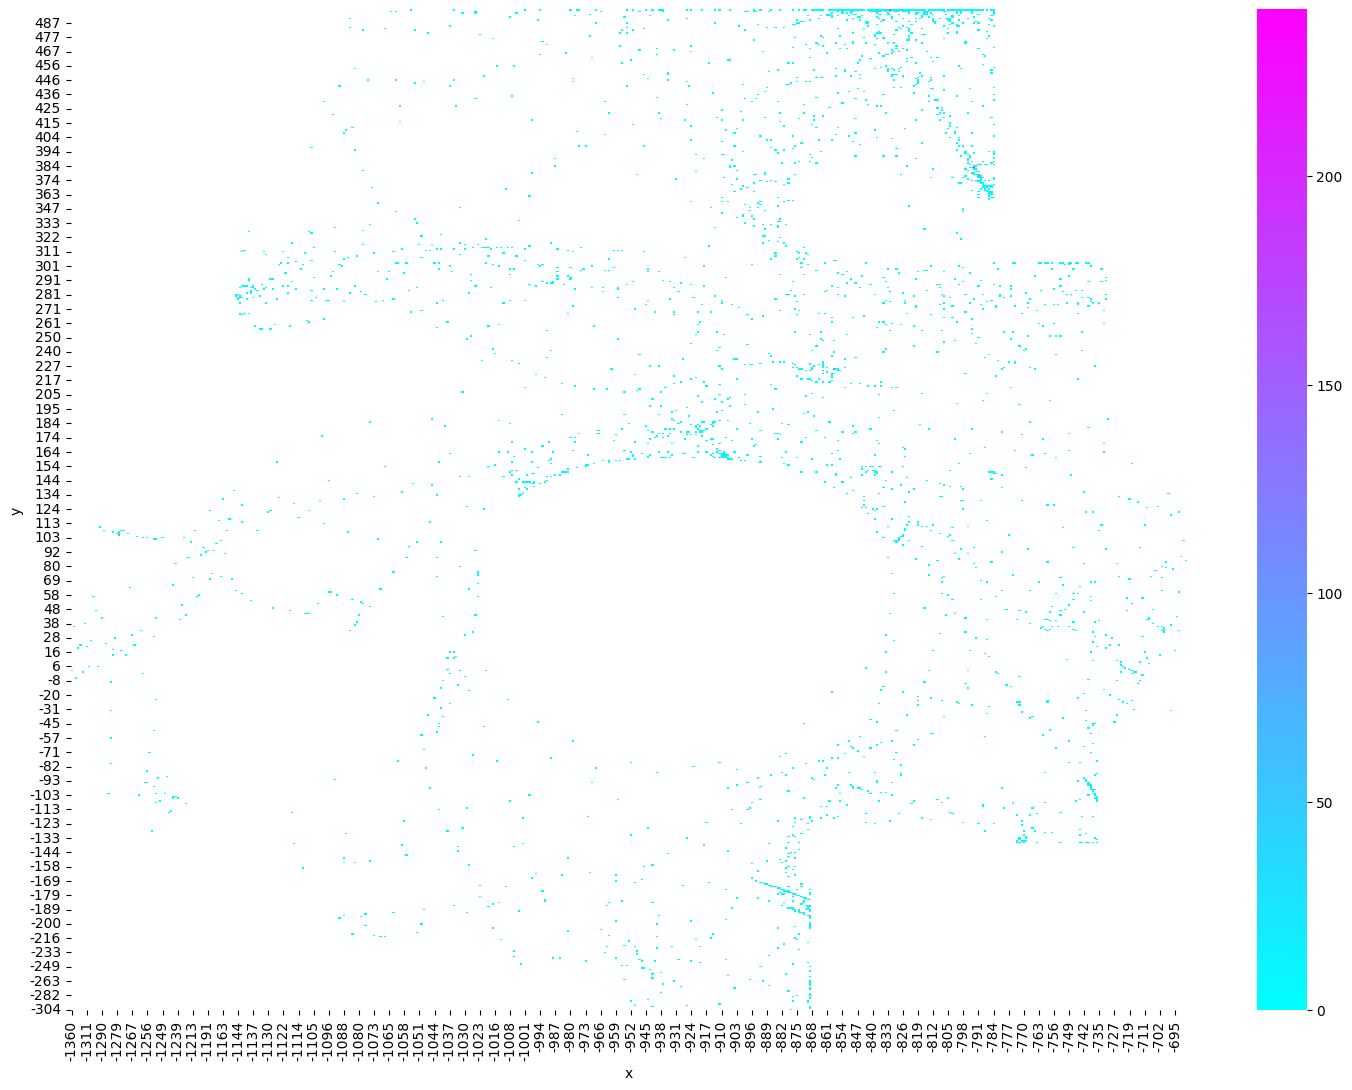

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,13))
ax = sns.heatmap(data=ct_siteB, vmin=0, vmax=240, cmap='cool', cbar=True)
ax.invert_yaxis()
plt.style.use("dark_background")

From the heapmap above, we see the clustering of the most common areas that players traverse at BombsiteB.

There is a high frequency of player movement to the top-right of BombsiteB with two individual clusters centering around the following xy-coordinates:

1. (-793, 383) at 243 (maximum peak)
2. (-832, 496) at 138 (local peak)

These two coordinates can be seen in the heatmap above (top-right corner as indicated by two small red dots).

There are clustering of other points as well in the heatmap above, just with greater significance around the 2 clusters around points 1 and 2.

It is within reason to predict that (1) top-right region of BombsiteB as players show a high freqency of movement to that area. The next two areas that see high number of player traversals are near (2) center of BombsiteB and (3) the bottom-right of BombsiteB.



#TODO Begin MACHINE LEARNING
